In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("kidsInMindSubtitles2004.csv")

In [4]:
df[:5].to_csv("sample_kidsinmind.csv", index = False)

In [10]:
for col in df.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
Movie_Title
Sex_Nudity
Violence_Gore
Language
Movie_Description
Sex_Nudity_Description
Violence_Gore_Description
Language_Description
Substance_Use_Description
Discussion_Topics_Description
Message
HyperLink
subtitles


In [11]:
#!pip install ohmeow-blurr -q
#!pip install bert-score -q

In [12]:
from fastai.text.all import *
from blurr.text.data.all import *

2024-02-02 11:57:54.720613: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-02 11:57:54.755636: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 11:57:55.319141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
df = df.dropna().reset_index()

In [14]:
df

,index,Unnamed: 0.1,Unnamed: 0,Movie_Title,Sex_Nudity,Violence_Gore,Language,Movie_Description,Sex_Nudity_Description,Violence_Gore_Description,Language_Description,Substance_Use_Description,Discussion_Topics_Description,Message,HyperLink,subtitles
0,0,1,1,Abduction,4,5,5,"After a teenager (Taylor Lautner) discovers that who he thought were his parents are actually CIA agents assigned to keep him safe, his world quickly comes unraveled. He then sets out to find the truth about his life. Also with Lily Collins, Alfred Molina, Maria Bello and Sigourney Weaver. Directed by John Singleton. [1:46]","A teen boy and a teen girl share a lingering, passionate kiss; the girl wraps her legs around the boy's waist and he lifts her up, he sits down, the girl straddles him and they continue kissing until the girl pulls away.\n► Teen girls and boys are seen in a swimming pool; the girls wear cleavage-exposing bikinis and the bare chests and backs of the boys are visible. The bare chest and back of a teen boy is visible as he awakens shirtless, and we see him walking around shirtless. On two occasions we see the bare abdomen of a teen girl as she wears her shirt tied up. A teen girl wears a low-...","Two snipers shoot and kill five men (no blood is visible); we see the bodies of the men hit the ground and later see a man standing over the body of one of them (no blood is visible). A SWAT team storms into an apartment where six men are seen sitting or sleeping, and the team opens fire, presumably killing all of the apartment's occupants.\n► Two gunmen fire machine guns into a restaurant where a man, a woman and a teen boy and teen girl sit; the gunmen enter the room and see the man and the woman slumped over, appearing to be dead (they are unharmed), the man and the woman grab guns and ...","At least 1 F-word, 4 scatological terms (1 mild), 4 anatomical terms, 3 mild obscenities, name-calling (freak, psycho, foolish, boring, stubborn, little man), 4 religious exclamations.","Teenage boys and girls are seen drinking unidentified alcoholic drinks at a party, a teen boy drinks to the point of drunkenness and we see him passed out with a cup in his hand, a teen boy tells his father he was ""hangover,"" a teen girl teases a teen boy about being so intoxicated at a party that he passed out in his underwear, a woman warns her teen son that she does not want him to get in a drunk driving accident, a bottle of wine with two glasses is seen in front of a man and a woman, we hear lyrics of a song that say ""I want to drink your wine,"" a teen boy sells other teens fake IDs (...","The CIA, disappearances, child abductions, trust, dishonesty, jealousy, disappointment, finding one's family, adoption, espionage, revenge.",It can be hard to trust people when you are unsure of their background.,https://kids-in-mind.com/a/abduction.htm,"Advertise your product or brand here\ncontact www.OpenSubtitles.org todayNATHAN: Let's go party![WHOOPING]Yeah, baby!Yeah! Gilly,\nget out here!BOTH: Yeah! Yeah!Let's go, baby,\nwe got bitches waiting![BOTH EXCLAIMING]Go! Faster!\nPut the pedal\nto the metal!Party!BOTH: Go! Go! Go!Yeah, Jake! [WHOOPS]Yeah!NATHAN: Hey, ladies.\nWe are here.You guys are crazy!Get ready to party.Yeah!We are here!GILLY: Whoa! [LAUGHING]Yo, Nathan.Dude, you're crazy.Yes, I am.You all right, man? Okay.Yeah, I'm good.Let's do this.Let's go.[CROWD CLAMORING]Oh, check it out!Dude.BOY: Gilly!Yo, guys,\nbe right back..."
1,1,3,3,About Last Night,7,2,10,"Two couples (Keven Hart and Regina Hall, and Michael Ealy and Joy Bryant) meet in a bar. They explore new love and casual sex, but are stymied by the realities of daily life. Also with Paula Patton and Christopher McDonald. Directed by Steve Pink. [1:40]",A bedroom scene features a man sitting upright (we see his bare chest) thrusting and a woman under covers with only shoulders and arms revealed; she is grunting and gasping and becomes angry because she has a Charlie-horse and the scene ends.\n► A man and 

In [15]:
#!pip install profanity-check

In [16]:
df['subtitles'][898]

'<i>Okay, welcome back.</i><i>This is Artie Decker,\nDe Voice of the Fresno Grizzlies...</i><i>and we\'ve got a good one, my friends.</i><i>Top of the ninth here at Chukchansi\nPark, and a beautiful night.</i><i>We can actually feel\nthat fall is finally an its way.</i>It\'s a rather crisp 107 degrees, but dry.We\'ve got 15,000 sweaty and bloated\npeople all pumped up on Churros...rooting on our Fresno Grizzlies.And Brad, this is why I love\nannouncing Minor League Baseball...because I get to say names\nlike "River Cats..."or the "Rancho Cucamonga Quakes."I don\'t have to ever say boring nameslike "Tigers," or "Red Sox," or "Cubs."Okay, we got a little break in the action...as they\'re having\na little meeting on the mound.Artie, do you know what time it is?I sure do, Brad.\nIt\'s time for Artie\'s Kiss Cam!Thank you, Gwen.Let\'s see what kind of young loverswe got at the ballpark tonight.All right, there\'s a kiss.Well, you know one thing when you seea kiss like that, they\'re married

In [17]:
df['Language_Description'][0]

'At least 1 F-word, 4 scatological terms (1 mild), 4 anatomical terms, 3 mild obscenities, name-calling (freak, psycho, foolish, boring, stubborn, little man), 4 religious exclamations.'

In [18]:
df['subtitles'][0]

'Advertise your product or brand here\ncontact www.OpenSubtitles.org todayNATHAN: Let\'s go party![WHOOPING]Yeah, baby!Yeah! Gilly,\nget out here!BOTH: Yeah! Yeah!Let\'s go, baby,\nwe got bitches waiting![BOTH EXCLAIMING]Go! Faster!\nPut the pedal\nto the metal!Party!BOTH: Go! Go! Go!Yeah, Jake! [WHOOPS]Yeah!NATHAN: Hey, ladies.\nWe are here.You guys are crazy!Get ready to party.Yeah!We are here!GILLY: Whoa! [LAUGHING]Yo, Nathan.Dude, you\'re crazy.Yes, I am.You all right, man? Okay.Yeah, I\'m good.Let\'s do this.Let\'s go.[CROWD CLAMORING]Oh, check it out!Dude.BOY: Gilly!Yo, guys,\nbe right back.What\'s up, homey?\nCheck it out, man.Good quality.\nYou like?BOY: Thanks, man.\nThis is hot.That\'s right.\nAll right, man.\nPeace.[ALL LAUGHING]200 bucks, man.Dude, that\'s criminal.No, it\'s a fair price.I make the best fake\nIDs in Pennsylvania.You know what?\nYou should put that on\nyour college application.[ALL LAUGHING][DANCE MUSIC PLAYING]Dude! I can\'t believe\nhow, like, mainstream\n

In [19]:
df['subtitles']=df['subtitles'].astype(str)

In [20]:
print(df['subtitles'][0])

Advertise your product or brand here
contact www.OpenSubtitles.org todayNATHAN: Let's go party![WHOOPING]Yeah, baby!Yeah! Gilly,
get out here!BOTH: Yeah! Yeah!Let's go, baby,
we got bitches waiting![BOTH EXCLAIMING]Go! Faster!
Put the pedal
to the metal!Party!BOTH: Go! Go! Go!Yeah, Jake! [WHOOPS]Yeah!NATHAN: Hey, ladies.
We are here.You guys are crazy!Get ready to party.Yeah!We are here!GILLY: Whoa! [LAUGHING]Yo, Nathan.Dude, you're crazy.Yes, I am.You all right, man? Okay.Yeah, I'm good.Let's do this.Let's go.[CROWD CLAMORING]Oh, check it out!Dude.BOY: Gilly!Yo, guys,
be right back.What's up, homey?
Check it out, man.Good quality.
You like?BOY: Thanks, man.
This is hot.That's right.
All right, man.
Peace.[ALL LAUGHING]200 bucks, man.Dude, that's criminal.No, it's a fair price.I make the best fake
IDs in Pennsylvania.You know what?
You should put that on
your college application.[ALL LAUGHING][DANCE MUSIC PLAYING]Dude! I can't believe
how, like, mainstream
you guys are.You guys are so 

In [21]:
df['subtitles'] = df['subtitles'].apply(lambda x: x.replace('/',''))
df['subtitles'] = df['subtitles'].apply(lambda x: x.replace('\xa0',''))

In [22]:
#!pip install ohmeow-blurr -Uqq

In [23]:
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.8/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")
/usr/local/lib/python3.8/dist-packages/datasets/load.py:752: FutureWarning: The repository for squad contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/squad/squad.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [18]:
#!pip install transformers -Uqq

In [24]:
from transformers import BartForConditionalGeneration

In [25]:
pretrained_model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name,
                                                                  model_cls=BartForConditionalGeneration)

In [26]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization');

In [27]:
text_gen_kwargs={'max_length': 248,
 'min_length': 56,
 'do_sample': False,
 'early_stopping': True,
 'num_beams': 4,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'repetition_penalty': 1.0,
 'bad_words_ids': None,
 'bos_token_id': 0,
 'pad_token_id': 1,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'no_repeat_ngram_size': 3,
 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1,
 'decoder_start_token_id': 2,
 'use_cache': True,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'remove_invalid_values': False}

In [28]:
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(
    hf_arch, hf_config, hf_tokenizer, hf_model, max_length=256, max_tgt_length=130, text_gen_kwargs=text_gen_kwargs
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=hf_batch_tfm), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader('subtitles'), get_y=ColReader('Language_Description'), splitter=RandomSplitter())

In [29]:
dls = dblock.dataloaders(df, bs=2)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3866: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [30]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'fr' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [31]:
#!pip install sacremoses

In [32]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learn = Learner(dls,
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()

learn.create_opt()
learn.freeze()

/usr/local/lib/python3.8/dist-packages/datasets/load.py:752: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/datasets/load.py:752: FutureWarning: The repository for bertscore contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/bertscore/bertscore.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the

In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
learn.fit_one_cycle(15, lr_max=2.2908675418875646e-06, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time
0,4.145522,3.915092,0.033608,0.000664,0.025866,0.577844,0.594509,0.585762,04:14
1,2.746081,2.686790,0.038528,0.000903,0.029637,0.578467,0.594408,0.585940,03:35
2,2.143346,2.164606,0.287290,0.143740,0.245533,0.716788,0.750941,0.731001,04:42
3,1.949727,2.028076,0.339465,0.177795,0.297892,0.762184,0.779110,0.768601,03:36
4,1.852735,1.972479,0.379217,0.197013,0.333921,0.776667,0.794171,0.783085,03:38
5,1.825173,1.945702,0.378389,0.204330,0.338509,0.780040,0.794498,0.785019,03:32
6,1.714730,1.924235,0.348027,0.185948,0.301826,0.761654,0.779172,0.768411,03:29
7,1.725052,1.911312,0.382247,0.203330,0.340304,0.780277,0.796976,0.786364,03:36
8,1.728153,1.908410,0.363826,0.196377,0.325910,0.772767,0.792284,0.780260,03:33
9,1.658331,1.898065,0.365735,0.199432,0.326885,0.775653,0.789397,0.780442,03:28


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [34]:
#learn.save("BartForSummarization")

In [35]:
loaded_dict = torch.load('models/BartForSummarization.pth')

In [36]:
model_state_dict = loaded_dict['model']

In [37]:
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [38]:
model.eval()

BaseModelWrapper(
  (hf_model): BartForConditionalGeneration(
    (model): BartModel(
      (shared): Embedding(50264, 1024, padding_idx=1)
      (encoder): BartEncoder(
        (embed_tokens): Embedding(50264, 1024, padding_idx=1)
        (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
        (layers): ModuleList(
          (0): BartEncoderLayer(
            (self_attn): BartAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (fc2): Linear(in_features=4096, out_feat

In [39]:
predictions=[]

In [38]:
import pandas as pd
for sub in df.subtitles:
    outputs = learn.blurr_generate(sub, early_stopping=False, num_return_sequences=1)
    for idx, o in enumerate(outputs):
      predictions.append(o)

data={'Predicted_Summary': predictions, 'Language_Description':df.Language_Description.tolist()}
df2 = pd.DataFrame(data)
excel_filename = "predictions.xlsx"
df2.to_excel(excel_filename, index=False)
print("Summaries saved to:", excel_filename)

Summaries saved to: predictions.xlsx


/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:3586: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:3586: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


SuggestedLRs(valley=2.2908675418875646e-06)

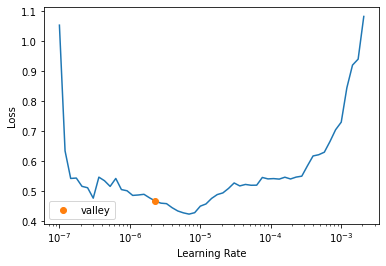

In [ ]:
learn.lr_find()

In [ ]:
df['subtitles'][0]

'Advertise your product or brand here\ncontact www.OpenSubtitles.org todayNATHAN: Let\'s go party![WHOOPING]Yeah, baby!Yeah! Gilly,\nget out here!BOTH: Yeah! Yeah!Let\'s go, baby,\nwe got bitches waiting![BOTH EXCLAIMING]Go! Faster!\nPut the pedal\nto the metal!Party!BOTH: Go! Go! Go!Yeah, Jake! [WHOOPS]Yeah!NATHAN: Hey, ladies.\nWe are here.You guys are crazy!Get ready to party.Yeah!We are here!GILLY: Whoa! [LAUGHING]Yo, Nathan.Dude, you\'re crazy.Yes, I am.You all right, man? Okay.Yeah, I\'m good.Let\'s do this.Let\'s go.[CROWD CLAMORING]Oh, check it out!Dude.BOY: Gilly!Yo, guys,\nbe right back.What\'s up, homey?\nCheck it out, man.Good quality.\nYou like?BOY: Thanks, man.\nThis is hot.That\'s right.\nAll right, man.\nPeace.[ALL LAUGHING]200 bucks, man.Dude, that\'s criminal.No, it\'s a fair price.I make the best fake\nIDs in Pennsylvania.You know what?\nYou should put that on\nyour college application.[ALL LAUGHING][DANCE MUSIC PLAYING]Dude! I can\'t believe\nhow, like, mainstream\n

In [40]:
outputs = learn.blurr_generate(df['subtitles'][0], early_stopping=False, num_return_sequences=1)

In [41]:
for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
{'generated_texts': ' 1 mild anatomical term, 1 mild obscenity, name-calling (stupid, stupid, stupid), 1 religious profanity (GD), 2 religious exclamations (e.g. Jesus, Jesus Christ, Oh My God, Oh God).\n'}



In [41]:
df['subtitles'][404]

'Aah!- Whoo!\n- Ha ha ha!Aah!Oh, man! Heh heh.- Did you see that?\n- Woo!Oh, my God. Ha ha!- Yes! Yes!\n- Nice, nice, nice.- Aw, sick!\n- Worth the wait.Oh, babe. You missed out.Yes!I want to get off.Whoo! Ow!Ha ha ha!That was intense, man.To feel how that would be\nto just crash and burn like that.Yeah, yeah. Maybe for you,\nbut our lives are actually goin\' somewhere.Oh! OK, well, where we gotta go\nis to the roller coaster.\'Cause our pass is for 9:15.If we miss that,\nwe\'ll stand in line...for, like, a day and a half,\nand that\'s gonna kill me.- OK!\n- All right?So let\'s go.They\'re totally gonna dig this, man!OK. Come on, it won\'t kill us to get\na deep-fried Snickers and a Coke.Before ridin\' Devil\'s Flight?\nYeah, that might kill me.No! What doesn\'t kill you\nmakes you stronger, man.Ha ha ha!- Unh!\n- Ha ha!Oh, I\'ll take that.No. Come on, gimme.\nIt\'s not even mine, Kevin.It\'s the yearbook\'s.\nJust... Kevin.Ha ha!- Oh!\n- Oh, got it.- Oh, my God, you\'re such an idiot.

In [42]:
outputs = learn.blurr_generate(df['subtitles'][404], early_stopping=False, num_return_sequences=1)

In [43]:
for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
{'generated_texts': ' 1 F-word, 1 obscene hand gesture, 1 sexual reference, 1 scatological term, 1 anatomical term, 2 mild obscenities, name-calling (idiot, idiot, crazy, stupid, crazy), exclamations (shut-up), 1 religious profanity, 1 religious exclamation (e.g. Oh my God, Oh My God).\n'}



In [83]:
df_predictions = pd.read_csv("df_predictions.csv")

In [86]:
df_predictions.head(1)

,Language_Score,Predcited_Score,subtitle,language_summary,cleaned_text,inappropriate_words,inappropriate_words_count
0,6,6.543292,"The High Council\nhas reached a verdict --guilty!You taught the K. O.K.\nhandshake to a girl.Dude, what were\nyou thinking?Boo-la.\nBoo-la. Boo-la.Boo-la. Boo-la.Boo-la. Boo-la.Boo-la. Boo-la. Boo-la.\nBoo-la. Boo-la.Spence, are you done yet?\nWe need this......room for the bobsled.Jiminy Cricket.Goddamn it, Dave!Mush, I say!-- Mush!\n-- Ow!Oh, come on!Change of plans, boys.\nSomeone ralphed all over\nthe living room.We need to relocate.\nYou guys, out.Hey, I will not tolerate\ninsubordinationduring my ceremony.Oh, just relax.Look, I thought that your mask\nwas really scary this time.You t...","13 F-words, 1 nearly uttered F-word, 3 obscene hand gestures, 9 sexual references, 12 scatological terms, 29 anatomical terms (the name of a fraternity house is KOK so whenever it is uttered it sounds like an anatomical term), 3 mild obscenities, 3 derogatory terms for lesbians, 2 religious profanities, 10 religious exclamations, and many insults.\n","the high council reached verdict --guilty!you taught k. o.k. handshake girl.dude, thinking?boo-la. boo-la. boo-la.boo-la. boo-la.boo-la. boo-la.boo-la. boo-la. boo-la. boo-la. boo-la.spence, yet? we need this......room bobsled.jiminy cricket.goddamn it, dave!mush, i say!-- mush! -- ow!oh, come on!change plans, boys. someone ralphed living room.we need relocate. you guys, out.hey, i tolerate insubordinationduring ceremony.oh, relax.look, i thought mask scary time.you ""fraternity brothers"" think wantin house, right? wrong.i'm president!dave?what's that, adam?i think it's time president got l...","['bondage', 'bitch', 'ass', 'fuck', 'fuck', 'goddamn', 'fat', 'shit', 'masturbate', 'hell', 'fuck', 'fat', 'fat', 'toilet', 'dead', 'skank', 'prick', 'ass', 'fuck', 'cock', 'toilet', 'toilet', 'toilet', 'fucking', 'tinkle', 'ugly', 'butt', 'stupid', 'stupid', 'hell', 'fucked', 'killing', 'fuck', 'sex', 'tits', 'bulldyke', 'damn', 'fat', 'stupid', 'ass', 'fucking', 'piss', 'desire', 'desire', 'desire', 'burn', 'tongue']",47


In [44]:
df['Language_Description'][404]

'34 F-words, 4 obscene hand gestures, 1 obscene arm gesture, 2 sexual references, 19 scatological terms, 5 anatomical terms, 10 mild obscenities, 1 religious profanity, 12 religious exclamations.\n'

In [ ]:
df['subtitles'][898]

'<i>Okay, welcome back.</i><i>This is Artie Decker,\nDe Voice of the Fresno Grizzlies...</i><i>and we\'ve got a good one, my friends.</i><i>Top of the ninth here at Chukchansi\nPark, and a beautiful night.</i><i>We can actually feel\nthat fall is finally an its way.</i>It\'s a rather crisp 107 degrees, but dry.We\'ve got 15,000 sweaty and bloated\npeople all pumped up on Churros...rooting on our Fresno Grizzlies.And Brad, this is why I love\nannouncing Minor League Baseball...because I get to say names\nlike "River Cats..."or the "Rancho Cucamonga Quakes."I don\'t have to ever say boring nameslike "Tigers," or "Red Sox," or "Cubs."Okay, we got a little break in the action...as they\'re having\na little meeting on the mound.Artie, do you know what time it is?I sure do, Brad.\nIt\'s time for Artie\'s Kiss Cam!Thank you, Gwen.Let\'s see what kind of young loverswe got at the ballpark tonight.All right, there\'s a kiss.Well, you know one thing when you seea kiss like that, they\'re married

In [87]:
df['Language_Description'][404]

'34 F-words, 4 obscene hand gestures, 1 obscene arm gesture, 2 sexual references, 19 scatological terms, 5 anatomical terms, 10 mild obscenities, 1 religious profanity, 12 religious exclamations.\n'

In [88]:
outputs = learn.blurr_generate(df['subtitles'][898], early_stopping=False, num_return_sequences=1)

In [89]:
for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

=== Prediction 1 ===
{'generated_texts': ' 1 F-word, 1 scatological term, 1 anatomical term, 2 mild obscenities, name-calling (stupid, stupid, dumb, stupid), exclamations (shut-up), 1 religious profanity, 1 religious exclamation (e.g. Oh my gosh, Oh My God).\n'}



In [2]:
import pandas as pd

In [90]:
#df_predictions = pd.read_csv("df_predictions.csv")

In [91]:
#df_predictions['cleaned_text']

In [92]:
import pandas as pd
for sub in df.subtitles:
    outputs = learn.blurr_generate(sub, early_stopping=False, num_return_sequences=1)
    break

In [93]:
outputs[0]['generated_texts']

' 1 mild anatomical term, 1 mild obscenity, name-calling (stupid, stupid, stupid), 1 religious profanity (GD), 2 religious exclamations (e.g. Jesus, Jesus Christ, Oh My God, Oh God).\n'

In [94]:
#df['Language_Description'][0]

In [95]:
df_predictions['bart'] = None

In [96]:
from tqdm import tqdm

In [97]:

for idx in tqdm(range(len(df_predictions))):
    
    
    query = "Given the subtitle rating of a movie = "+str(round(df_predictions['Predcited_Score'][idx], 1))+" \
    ; and a list of inappropriate words : "+ df_predictions['inappropriate_words'][idx] + " Generate \
    language summary like kids in mind website? Please consider the below two example language summaries of \
    Please consider the below two example language summaries of \
    movies:  \n 1." + df['Language_Description'][0] + "\n 2."+df['Language_Description'][1]

    query = query.replace("[", "")
    query = query.replace("]", "\n\n")
    
    # print("-----------")
    # print(query)
    
    outputs = learn.blurr_generate(query, early_stopping=False, num_return_sequences=1)
    
    df_predictions['bart'][idx] = outputs[0]['generated_texts']
    break

  0%|                                                                                                                                  | 0/201 [00:01<?, ?it/s]


SettingWithCopyError: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [74]:
#df_predictions['bart'][idx] = outputs[0]['generated_texts']

In [81]:
#df_predictions.iloc[0]['bart'] = outputs[0]['generated_texts']

In [106]:
#df_predictions['Predcited_Score'][0] = 1

In [108]:
df_predictions = pd.read_csv("df_predictions.csv")

In [109]:
df_predictions

,Language_Score,Predcited_Score,subtitle,language_summary,cleaned_text,inappropriate_words,inappropriate_words_count
0,6,6.543292,"The High Council\nhas reached a verdict --guilty!You taught the K. O.K.\nhandshake to a girl.Dude, what were\nyou thinking?Boo-la.\nBoo-la. Boo-la.Boo-la. Boo-la.Boo-la. Boo-la.Boo-la. Boo-la. Boo-la.\nBoo-la. Boo-la.Spence, are you done yet?\nWe need this......room for the bobsled.Jiminy Cricket.Goddamn it, Dave!Mush, I say!-- Mush!\n-- Ow!Oh, come on!Change of plans, boys.\nSomeone ralphed all over\nthe living room.We need to relocate.\nYou guys, out.Hey, I will not tolerate\ninsubordinationduring my ceremony.Oh, just relax.Look, I thought that your mask\nwas really scary this time.You t...","13 F-words, 1 nearly uttered F-word, 3 obscene hand gestures, 9 sexual references, 12 scatological terms, 29 anatomical terms (the name of a fraternity house is KOK so whenever it is uttered it sounds like an anatomical term), 3 mild obscenities, 3 derogatory terms for lesbians, 2 religious profanities, 10 religious exclamations, and many insults.\n","the high council reached verdict --guilty!you taught k. o.k. handshake girl.dude, thinking?boo-la. boo-la. boo-la.boo-la. boo-la.boo-la. boo-la.boo-la. boo-la. boo-la. boo-la. boo-la.spence, yet? we need this......room bobsled.jiminy cricket.goddamn it, dave!mush, i say!-- mush! -- ow!oh, come on!change plans, boys. someone ralphed living room.we need relocate. you guys, out.hey, i tolerate insubordinationduring ceremony.oh, relax.look, i thought mask scary time.you ""fraternity brothers"" think wantin house, right? wrong.i'm president!dave?what's that, adam?i think it's time president got l...","['bondage', 'bitch', 'ass', 'fuck', 'fuck', 'goddamn', 'fat', 'shit', 'masturbate', 'hell', 'fuck', 'fat', 'fat', 'toilet', 'dead', 'skank', 'prick', 'ass', 'fuck', 'cock', 'toilet', 'toilet', 'toilet', 'fucking', 'tinkle', 'ugly', 'butt', 'stupid', 'stupid', 'hell', 'fucked', 'killing', 'fuck', 'sex', 'tits', 'bulldyke', 'damn', 'fat', 'stupid', 'ass', 'fucking', 'piss', 'desire', 'desire', 'desire', 'burn', 'tongue']",47
1,7,7.480484,"Danny, give me my shirt!Come and get it.Don't you think that maybe we're taking\nthis hazing thing a little bit too far?I absolutely do not.Hey!Cassidy!- Hey, give me a beer. Come on, man.\n- Get your own, pretty boy.- Don't be a dick.\n- Get your own.Hey, move it, douche bag. Get out of here.Mmm. Sudsy!Hey, Chugs! Give me a beer! And a BJ.Hey, what the fuck?Hey, no! You both, out! Now!Some massive titties!How long have you been a Theta?- Do you want one?\n- No, thanks.- Hey, Ellie, up here.\n- I got to go. Sorry.It wasn't that hard a question.Asshole!- Where are we going, Claire?\n- Hurry...","About 25 F-words, 2 obscene hand gestures, 8 sexual references, 10 scatological terms, 13 anatomical terms, 23 mild obscenities, name-calling (dummy, psycho, freak show, retarded, dumb, jerk, idiot, ""are you deaf or stupid,"" ugly), 17 religious exclamations.\n","danny, shirt!come it.don't think maybe we're taking hazing thing little bit far?i absolutely not.hey!cassidy!- hey, beer. come on, man. - get own, pretty boy.- don't dick. - get own.hey, it, douche bag. get here.mmm. sudsy!hey, chugs! give beer! and bj.hey, fuck?hey, no! you both, out! now!some massive titties!how long theta?- do want one? - no, thanks.- hey, ellie, here. - i got go. sorry.it wasn't hard question.asshole!- where going, claire? - hurry up. jessica's waiting.goodbye, virginity! yeah! theta pi rules!i think i'm gonna sick. look below!heather, room.hey, boys. out, out, out!- i...","['douche', 'damn', 'bitch', 'bra', 'sex', 'laid', 'shit', 'fuck', 'puke', 'bitch', 'fucking', 'died', 'fucking', 'fucking', 'died', 'hell', 'fuck', 'stupid', 'destroy', 'attack', 'destroy', 'kill', 'killer', 'fuck', 'dead', 'fucking', 'hell', 'kill', 'hole', 'killed', 'god', 'stupid', 'devil', 'ass', 'kill', 'fuck', 'kill', 'hell', 'screw', 'rape', 'burn', 'kill', 'hell', 'killed', 'dead', 'dead'